In [1]:
#run step1_gatherData.py

In [2]:
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
from scipy.stats import norm
%matplotlib inline

### 1. Load in the summarized subject data

A total of 69 subjects


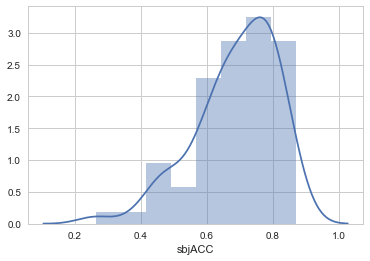

In [3]:
df = pd.read_pickle('gpData_v1.pkl')
NrSbj = len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')
df_tskSw = df.loc[df.phase=='TaskSw',:]
sbj_tsACC = df_tskSw.groupby('sbjId').sbjACC.mean()
sns.distplot(sbj_tsACC)

#### 1a. Exclude subjects with low task-switching accuracy (<60%)

In [4]:
#%% do a fist pass to exclude subjects with low cued task accuracy, and low Correct rejection rate
goodSbj=[]
excludeSbj=[]
for S in np.unique(df.sbjId):
    D = df.loc[df.sbjId==S]    
    if (D[D.phase=='TaskSw'].sbjACC.mean()*100 > 55) & (D.loc[D.memCond=='new'].sbjACC.mean()*100 > 55):
        goodSbj.append(S)
    else:
        excludeSbj.append(S)
for S in excludeSbj:
    df.drop(df[df.sbjId==S].index, axis=0, inplace=True)
validSCNT = len(np.unique(df.sbjId))
print('After excluding subjects with poor performance: A total of ' + str(validSCNT) + ' subjects')

After excluding subjects with poor performance: A total of 52 subjects


### 2. Look at Task-switching data:

Overall accuracy for the task-switching control task was 72.85%
Overall RT (correct trials) for the task-switching control task was 725.46ms


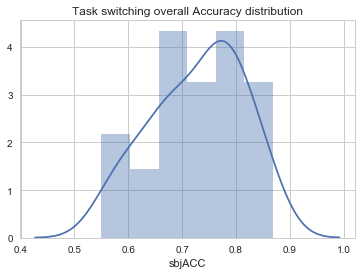

In [5]:
df_tskSw = df.loc[df.phase=='TaskSw',:]
sbj_tsACC = df_tskSw.groupby('sbjId').sbjACC.mean()
#print(sbj_tsACC)  # might need to exclude low accuracy subjects later on - lower than 70% or 65%
sns.distplot(sbj_tsACC)
plt.title('Task switching overall Accuracy distribution')
TS_meanACC = df_tskSw.groupby('sbjId').sbjACC.mean().mean()*100
TS_meanRT  = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the task-switching control task was ' + '{:.2f}'.format(TS_meanACC) + '%')
print('Overall RT (correct trials) for the task-switching control task was ' + '{:.2f}'.format(TS_meanRT) + 'ms')

#### 2a. Task-switching ACC as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Group mean ACC--------
respComp  trialType
RC        switch       77.115385
          repeat       87.019231
RIC       switch       52.259615
          repeat       75.000000
Name: sbjACC, dtype: float64


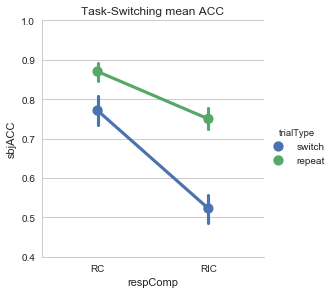

In [6]:
condM_ts_acc = df_tskSw.groupby(['sbjId','respComp','trialType']).sbjACC.mean().reset_index()  
# a dataframe of subjects x 2 x 2 conditions 
print('------Group mean ACC--------')
gpResult_ts_acc  = condM_ts_acc.groupby(['respComp','trialType']).sbjACC.mean()*100
print(gpResult_ts_acc)
# plot the result
g = sns.factorplot(x='respComp',y='sbjACC', hue='trialType', data = condM_ts_acc)
plt.title("Task-Switching mean ACC")
g.set(ylim=(.4,1))

#### 2b. Task-switching RT (correct trials) as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Group mean RT (correct trials only)--------
respComp  trialType
RC        switch       738.599218
          repeat       687.856772
RIC       switch       785.388167
          repeat       718.741282
Name: sbjRT, dtype: float64


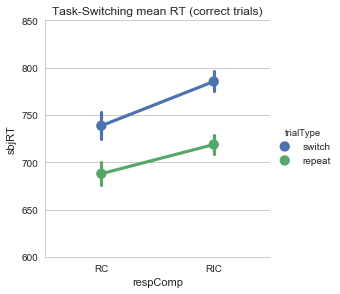

In [7]:
condM_ts_rt = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby(['sbjId','respComp','trialType']).sbjRT.mean().reset_index()
# a dataframe of subject x 2 x 2 conditions 
print('------Group mean RT (correct trials only)--------')
gpResult_ts_rt = condM_ts_rt.groupby(['respComp','trialType']).sbjRT.mean()
print(gpResult_ts_rt)

g = sns.factorplot(x='respComp',y='sbjRT', hue='trialType', data=condM_ts_rt)
plt.title("Task-Switching mean RT (correct trials)")
g.set(ylim=(600,850))

#### 2c. Task-switching RT (correct trials) as a function of 2 (task: animacy, size) x 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

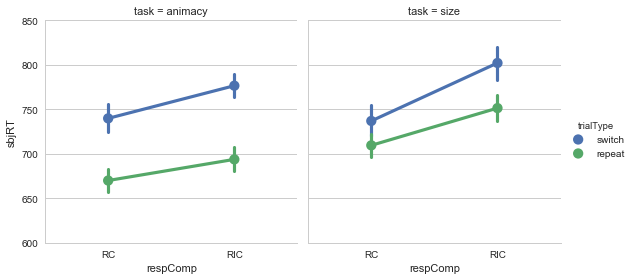

In [8]:
condM_ts_rt_byTask = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby(['sbjId','task','respComp','trialType']).sbjRT.mean().reset_index()
# a dataframe of subject x (2 x 2 x 2 conditions)
g = sns.factorplot(x='respComp',y='sbjRT', hue='trialType',col="task", data=condM_ts_rt_byTask)
g.set(ylim=(600,850))

### 3. Look at Subsequent Memory Data

In [9]:
df_mem = df.loc[df.phase=='Mem',:]
mem_meanACC = df_mem.groupby('sbjId').sbjACC.mean().mean()*100
mem_meanRT  = df_mem.groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the subsequent memory task (all items: old and new) was ' + '{:.2f}'.format(mem_meanACC) + '%')
print('Overall RT (all trials) for the subsequent memory task was ' + '{:.2f}'.format(mem_meanRT) + 'ms')

Overall accuracy for the subsequent memory task (all items: old and new) was 69.59%
Overall RT (all trials) for the subsequent memory task was 979.38ms


#### 3a. Overall correct Rejection (CR) Rate (new item and rated as 'new')

False Alarm Rate was 24.86%


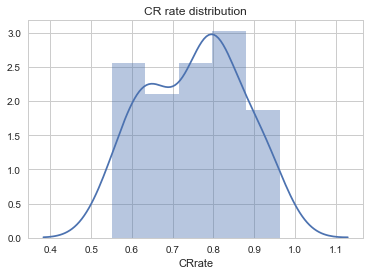

In [10]:
# if a subject's correct rejection rate is too low, might need to exclude this subject later on
condM_mem_CRrate = df_mem.loc[df_mem.memCond=='new',:].groupby(['sbjId']).sbjACC.mean().reset_index()
condM_mem_CRrate.rename(columns={'sbjACC': 'CRrate'}, inplace=True)
# a table of subject x CRrate
sns.distplot(condM_mem_CRrate.CRrate)
plt.title('CR rate distribution')
gpResult_CRrate = condM_mem_CRrate.CRrate.mean()*100
print('False Alarm Rate was ' + '{:.2f}'.format(100-gpResult_CRrate) + '%')

#### 3b. Correct Rejection (CR) Rate (new item and rated as 'new') and Hit Rate (old item as 'old') broken down by stimulus category

oldNew  stimCat
New     Liv-Lg     67.596154
        Liv-Sm     68.846154
        NLiv-Lg    78.846154
        NLiv-Sm    85.288462
Old     Liv-Lg     68.269231
        Liv-Sm     72.548077
        NLiv-Lg    60.048077
        NLiv-Sm    66.394231
Name: sbjACC, dtype: float64


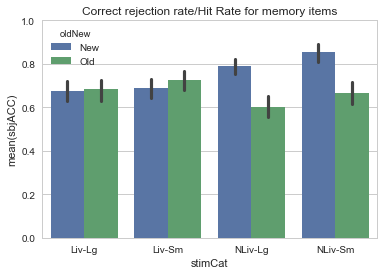

In [11]:
memACC_byCat = df_mem.groupby(['sbjId','oldNew','stimCat']).sbjACC.mean().reset_index()
# 2(Old, New) x 4(living-large, living-small, nonliving-large, nonliving-small)
gpResult_memACC_byCat = memACC_byCat.groupby(['oldNew','stimCat']).sbjACC.mean()*100
print(gpResult_memACC_byCat)
g = sns.barplot(x='stimCat',y='sbjACC', hue = 'oldNew', data = memACC_byCat)
g.set(ylim=(0, 1))
plt.title("Correct rejection rate/Hit Rate for memory items")

#### 3c. Hit rate (old item and rated as 'old', all correct trials during T1) as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat)

---------- Group mean Hit Rate (T1 correct items only) -----------
respComp  trialType
RC        switch       66.404216
          repeat       67.988271
RIC       switch       64.632555
          repeat       70.371522
Name: Hits, dtype: float64


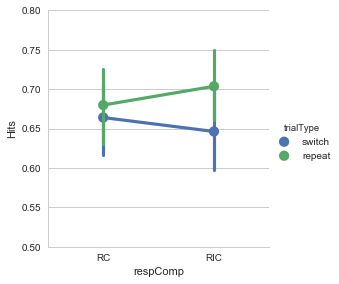

In [12]:
# Look at only images that were correct during T1 (Task-switching)
df_old = df_mem.loc[(df_mem.memCond!='new') & (df_mem.task1ACC==1)]
condM_mem_hits = df_old.groupby(['sbjId','respComp','trialType']).sbjACC.mean().reset_index()
condM_mem_hits.rename(columns={'sbjACC': 'Hits'}, inplace=True)
# a table of subject x condition 
print('---------- Group mean Hit Rate (T1 correct items only) -----------')
gpResult_hits= condM_mem_hits.groupby(['respComp','trialType']).Hits.mean()*100
print(gpResult_hits)
g = sns.factorplot(x='respComp',y='Hits', hue="trialType",data = condM_mem_hits)
g.set(ylim=(0.5, 0.8))

In [13]:
# Testing interaction on T1 correct imgages
a = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RC') & (condM_mem_hits.trialType=='switch'),'Hits'])
b = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RC') & (condM_mem_hits.trialType=='repeat'),'Hits'])
c = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RIC') & (condM_mem_hits.trialType=='switch'),'Hits'])
d = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RIC') & (condM_mem_hits.trialType=='repeat'),'Hits'])
simple_inX_test = stats.ttest_rel(a-b,c-d)
print(simple_inX_test.pvalue)

0.0817602404692


#### 3d. Hit rate (old item and rated as 'old', all correct trials during T1) as a function of 2 (task: Animacy, Size) x 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat)

--- Subsequent Memory Task mean ACC(Hit rate) as a function of task ---
task     respComp  trialType
animacy  RC        switch       65.475250
                   repeat       65.833186
         RIC       switch       63.658789
                   repeat       67.324835
size     RC        switch       67.680733
                   repeat       71.006610
         RIC       switch       66.713874
                   repeat       72.791455
Name: Hits, dtype: float64


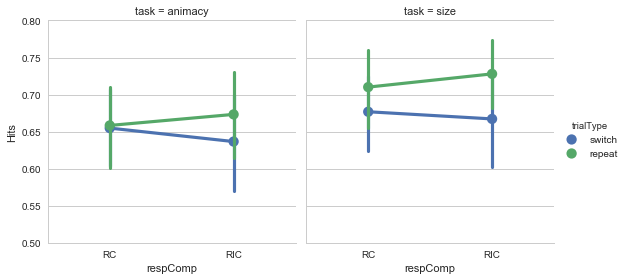

In [14]:
condM_mem_hits_byTask = df_old.groupby(['sbjId','task','respComp','trialType']).sbjACC.mean().reset_index()
condM_mem_hits_byTask.rename(columns={'sbjACC': 'Hits'}, inplace=True)
print('--- Subsequent Memory Task mean ACC(Hit rate) as a function of task ---')
gpResult_hits_byTask = condM_mem_hits_byTask.groupby(['task','respComp','trialType']).Hits.mean()*100
print(gpResult_hits_byTask)
# plot results
g = sns.factorplot(x='respComp',y='Hits',col="task", hue="trialType",data = condM_mem_hits_byTask)
g.set(ylim=(0.5, 0.8))

In [15]:
# Testing interaction with Task = ANIMACY
a = np.array(condM_mem_hits_byTask.loc[(condM_mem_hits_byTask.task=='animacy') & (condM_mem_hits_byTask.respComp=='RC') & (condM_mem_hits_byTask.trialType=='switch'),'Hits'])
b = np.array(condM_mem_hits_byTask.loc[(condM_mem_hits_byTask.task=='animacy') & (condM_mem_hits_byTask.respComp=='RC') & (condM_mem_hits_byTask.trialType=='repeat'),'Hits'])
c = np.array(condM_mem_hits_byTask.loc[(condM_mem_hits_byTask.task=='animacy') & (condM_mem_hits_byTask.respComp=='RIC') & (condM_mem_hits_byTask.trialType=='switch'),'Hits'])
d = np.array(condM_mem_hits_byTask.loc[(condM_mem_hits_byTask.task=='animacy') & (condM_mem_hits_byTask.respComp=='RIC') & (condM_mem_hits_byTask.trialType=='repeat'),'Hits'])
simple_inX_test = stats.ttest_rel(a-b,c-d)
print(simple_inX_test.pvalue)

0.387479952251


#### 3d. Calculate false alarm rate by response compatibility

In [16]:
condM_mem_byCat = df_old.groupby(['sbjId','respComp','trialType','stimCat']).sbjACC.mean().reset_index()
condM_mem_byCat.rename(columns={'sbjACC': 'Hits'}, inplace=True)
CRrate_byCat = df_mem.loc[df_mem.memCond=='new',:].groupby(['sbjId','stimCat']).sbjACC.mean().reset_index()
CRrate_byCat.rename(columns={'sbjACC': 'CRrate'}, inplace=True)
for r in range(0,len(condM_mem_byCat)-1,1):
    S     = condM_mem_byCat.loc[r,'sbjId']
    sCat  = condM_mem_byCat.loc[r,'stimCat']    
    condM_mem_byCat.loc[r,'CRrate']= float(CRrate_byCat.loc[(CRrate_byCat.stimCat==sCat) & (CRrate_byCat.sbjId==S),'CRrate'])

In [17]:
condM_mem_byCat.Hits.replace(1, 19.5/20, inplace=True)
condM_mem_byCat.CRrate.replace(1, 19.5/20, inplace=True)
condM_mem_byCat.Hits.replace(0, 0.5/20, inplace=True)
condM_mem_byCat.CRrate.replace(0, 0.5/20, inplace=True)
condM_mem_byCat['zHit']=stats.norm.ppf(condM_mem_byCat.Hits)
condM_mem_byCat['zFA'] =stats.norm.ppf(1-condM_mem_byCat.CRrate)
condM_mem_byCat['dprime'] = condM_mem_byCat['zHit'] - condM_mem_byCat['zFA']

C:\Users\yc180\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1901: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
C:\Users\yc180\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1901: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


#### 3e. d prime as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat)¶

------Memory d prime--------
respComp  trialType
RC        switch       1.285675
          repeat       1.344147
RIC       switch       1.222880
          repeat       1.446446
Name: dprime, dtype: float64


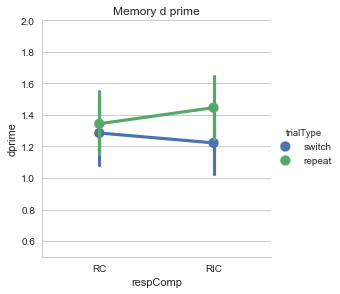

In [18]:
condM_dprime = condM_mem_byCat.groupby(['sbjId','respComp','trialType']).dprime.mean().reset_index()
# a table of subject x condition 
print('------Memory d prime--------')
gpResult_mem_dprime = condM_dprime.groupby(['respComp','trialType']).dprime.mean()
print(gpResult_mem_dprime)
# plot results
g = sns.factorplot(x='respComp',y = 'dprime', hue='trialType', data=condM_dprime)
g.set(ylim=(0.5, 2))
plt.title('Memory d prime')

In [19]:
# Testing dprime interaction on T1 correct imgages
a = np.array(condM_dprime.loc[(condM_dprime.respComp=='RC')  & (condM_dprime.trialType=='switch'),'dprime'])
b = np.array(condM_dprime.loc[(condM_dprime.respComp=='RC')  & (condM_dprime.trialType=='repeat'),'dprime'])
c = np.array(condM_dprime.loc[(condM_dprime.respComp=='RIC') & (condM_dprime.trialType=='switch'),'dprime'])
d = np.array(condM_dprime.loc[(condM_dprime.respComp=='RIC') & (condM_dprime.trialType=='repeat'),'dprime'])
simple_inX_test = stats.ttest_rel(a-b,c-d)
print(simple_inX_test.pvalue)

0.0485423940273


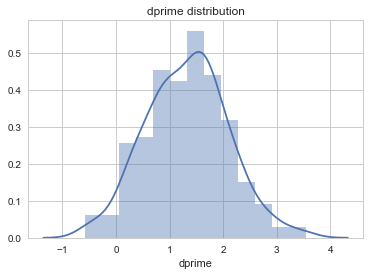

In [20]:
sns.distplot(condM_dprime.dprime)
plt.title('dprime distribution')

#### 3f. Subsequent memory (RT) as a function of memCond

------Memory RT--------
memCond
old-switch-RIC     971.035651
old-switch-RC      974.352858
old-repeat-RIC     960.585651
old-repeat-RC      965.753276
new               1002.259378
Name: sbjRT, dtype: float64


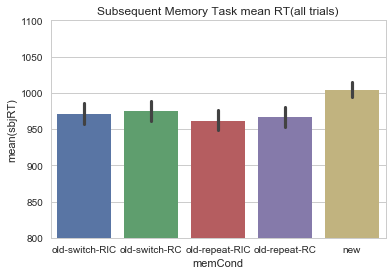

In [21]:
condM_mem_rt = df_mem.groupby(['sbjId','memCond']).sbjRT.mean().reset_index()
# a table of subject x condition 
print('------Memory RT--------')
gpResult_mem_rt = condM_mem_rt.groupby(['memCond']).sbjRT.mean()
print(gpResult_mem_rt)
# plot results
g = sns.barplot(x='memCond',y='sbjRT', data=df_mem)
g.set(ylim=(800, 1100))
plt.title("Subsequent Memory Task mean RT(all trials)")